In [2]:
import pandas as pd
import matplotlib
%matplotlib inline
from matplotlib import pylab as plt
import multiprocessing as mp
import warnings

from lane_queues.sim_worker import *

lines: 7
lines to inspect: 1

lines: 7
lines to inspect: 5

lines: 7
lines to inspect: 2

lines: 7
lines to inspect: 4

lines: 7
lines to inspect: 3

lines: 7
lines to inspect: 6

lines: 7
lines to inspect: 7










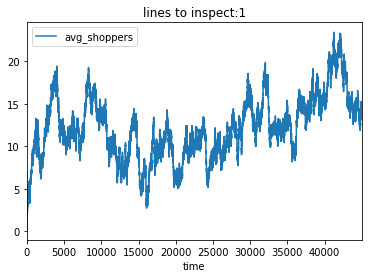

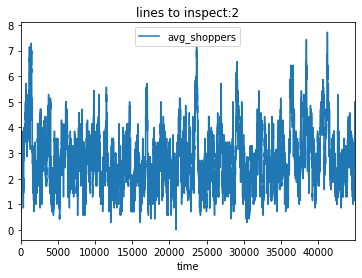

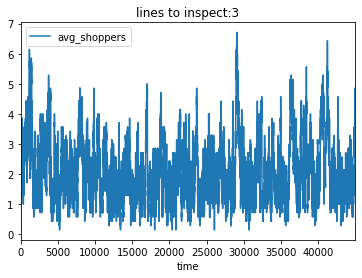

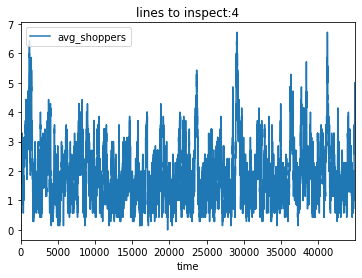

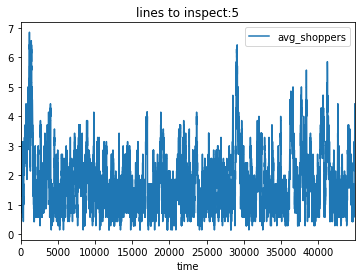

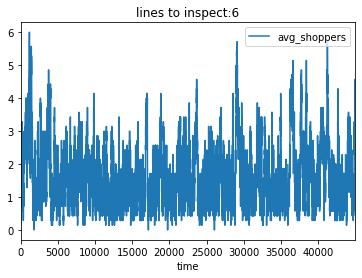

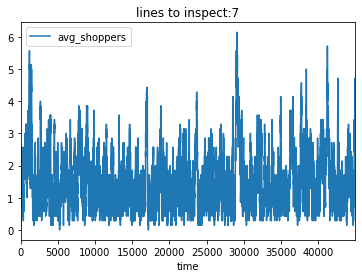

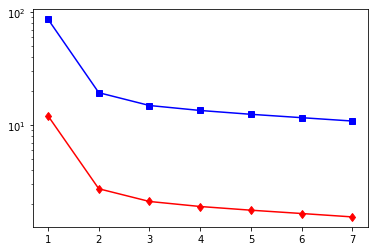

In [3]:
warnings.filterwarnings('ignore')
pool = mp.Pool(mp.cpu_count())

total_time = 45000
p_shopper = 0.98
p_checkout = 0.15
lines = 7

sl = simulation_lines(total_time, lines) 
spa = simulation_prob_arrive(total_time, p_shopper)
spc = simulation_prob_checkout(total_time, lines, p_checkout)
inputs2 = tuple([(i, lines, total_time, sl, spa, spc) for i in range(1, lines+1)])
#result = pool.map(lockstep_worker, inputs2)

inputs1 = tuple([(i, lines, total_time, p_shopper, p_checkout) for i in range(1, lines+1)])
result = pool.map(random_worker, inputs1)

vs = []
vw = []
ds = []
for df, d in result:
    dq = df.describe()
    vs.append(dq["avg_shoppers"]["mean"])
    vw.append(dq["avg_wait"]["mean"])
    ds.append(d)
    df.plot(x=0, y=1, title="lines to inspect:{}".format(d))
    plt.show()
    
plt.semilogy(ds, vs, "r-d")
plt.semilogy(ds, vw, "b-s")
plt.show()